In [1]:
#Import the modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import itertools
import pdb

In [2]:
#Name the headers of the data and read the file
colName = ['lettr','x-box','ybox','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'];
data = pd.read_csv('LRD.data',header = None, names = colName);

In [3]:
#Check how the dataset looks like
data.head()

,lettr,x-box,ybox,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
#Size of the data
data.shape

(20000, 17)

In [5]:
#Check for missing values
pd.isnull(data).sum()

lettr    0
x-box    0
ybox     0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

There are no missing values in our data! Now, lets see the distribution of our classes

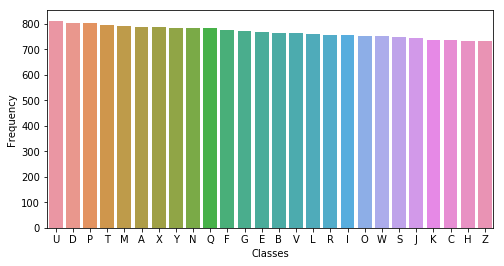

In [6]:
#Check whether the classes are balanced or not
plt.subplots(figsize=(8,4))
sns.barplot(x = data['lettr'].value_counts().index, y = data['lettr'].value_counts().values);
plt.xlabel('Classes');
plt.ylabel('Frequency');

The dataset is indeed balanced. The first step is dividing the data into training and test. For that purpose, the instances of each classes are divided into a split of 80-20 and shuffled after splitting in the function below:-

In [7]:
#Function that divides the data into training and test randomly
def Preprocessing(df):
    labels_train = pd.DataFrame();
    features_train = pd.DataFrame();
    labels_test = pd.DataFrame();
    features_test = pd.DataFrame();
    #Seperate features and labels of each class
    for i in range(26):
        labels_class = df.lettr[df['lettr'] == chr(ord('A') + i)];
        features_class = df[df['lettr'] == chr(ord('A') + i)].drop(['lettr'], axis = 1);
        index = np.random.permutation(len(labels_class)); #Random Indexes to divide the dataset into train and test
        labels_train = pd.concat([labels_train, labels_class.iloc[index[0:650:1]]]);
        features_train = pd.concat([features_train, features_class.iloc[index[0:650:1]]]);
        labels_test = pd.concat([labels_test, labels_class.iloc[index[650:len(labels_class)]]]);
        features_test = pd.concat([features_test, features_class.iloc[index[650:len(labels_class)]]]);
    #Shuffle the training data
    shuff = np.random.permutation(len(labels_train));
    labels_train = labels_train.iloc[shuff];
    features_train = features_train.iloc[shuff];
    #Shuffle the test data
    shuff = np.random.permutation(len(labels_test));
    labels_test = labels_test.iloc[shuff];
    features_test = features_test.iloc[shuff];

    return labels_train, features_train, labels_test, features_test;

In [8]:
labels_train, features_train, labels_test, features_test = Preprocessing(data);
labels_train.columns = ['lettr'];
labels_test.columns = ['lettr'];

In [9]:
#Naive Bayes Models

#Find the prior probability of each class
prior = np.zeros((26,1));

for i in range(26):
    prior[i] = (labels_train == chr(ord('A') + i)).sum()/len(labels_train);

#Seperate the features of each class and find the probability matrix(each feature)
likelihood = np.zeros((26,16));

for i in range(26):
    tidx = labels_train == chr(ord('A') + i);
    temp = features_train[tidx.values];
    likelihood[i,:] = (1 + np.sum(temp,axis = 0))/np.sum(temp).sum();
    
#Classify using Multinomial Naivee Bayes
prob = np.zeros((26,1));
pred = np.ndarray(shape=(len(labels_test),1), dtype=object);

for i in range(len(labels_test)):
    for j in range(26):
        prob[j] = np.log(prior[j]) + np.sum(np.log(likelihood[j,:])*features_test.iloc[i])
    maxIndex = np.argmax(prob);
    pred[i] = chr(ord('A') + maxIndex);

In [10]:
acc = np.array(np.sum(labels_test == pred)/len(labels_test))
print('The accuracy for Multinomial Naive Bayes:',np.around(acc[0]*100,decimals=3))

The accuracy for Multinomial Naive Bayes: 55.903


In [11]:
cnf = confusion_matrix(labels_test, pred);cnf

array([[119,   2,   0,   0,   0,   0,   0,   1,   0,   4,   3,   0,   0,
          0,   0,   0,   5,   1,   0,   0,   0,   0,   2,   1,   1,   0],
       [  0,  68,   1,   2,   0,   0,  13,   0,   2,   1,   0,   0,   0,
          0,   0,   0,   1,   4,  12,   0,   0,   0,   0,  11,   0,   1],
       [  0,   0,  62,   1,   0,   2,   2,   1,   0,   0,  11,   2,   0,
          0,   3,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  8,  12,   6,  97,   0,   0,   0,   1,   0,  10,   3,   0,   4,
          0,   2,   1,   0,   1,   0,   0,   0,   0,   0,  10,   0,   0],
       [  0,   5,  27,   0,  31,   2,   2,   0,   3,   0,   1,   0,   0,
          0,   0,   0,   4,   5,   7,   0,   0,   0,   0,  28,   0,   3],
       [  0,   6,   0,   1,   0,  85,   0,   0,   3,   1,   0,   0,   0,
          0,   0,   6,   1,   0,   2,   5,   0,   0,   3,  12,   0,   0],
       [  2,   5,  25,   2,   1,   0,  48,   1,   0,   0,   9,   6,   2,
          0,   1,   0,  13,   5,   3,   0,   

In [12]:
print(classification_report(labels_test, pred, target_names=data.lettr))

             precision    recall  f1-score   support

          T       0.71      0.86      0.78       139
          I       0.35      0.59      0.44       116
          D       0.38      0.72      0.50        86
          N       0.67      0.63      0.65       155
          G       0.61      0.26      0.37       118
          S       0.53      0.68      0.59       125
          B       0.38      0.39      0.38       123
          A       0.12      0.04      0.05        84
          J       0.66      0.81      0.73       105
          S       0.73      0.63      0.68        97
          M       0.20      0.24      0.21        89
          X       0.85      0.68      0.75       111
          O       0.70      0.65      0.68       142
          G       0.57      0.62      0.60       133
          M       0.57      0.54      0.56       103
          R       0.81      0.61      0.69       153
          F       0.58      0.60      0.59       133
          O       0.54      0.58      0.56   

C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 26, does not match size of target_names, 20000
  .format(len(labels), len(target_names))


In [13]:
#Implement Gaussian Naive Bayes
Meu = np.zeros((26,16)) #Calculate the mean for each class and feature
sigma = np.zeros((26,16)) #Calculate the std for each class and feature

for i in range(26):
    tidx = labels_train == chr(ord('A') + i);
    temp = features_train[tidx.values];
    Meu[i,:] = temp.mean()
    sigma[i,:] = temp.std()

check = np.zeros((26,1))
#Now classify the test data
for i in range(len(labels_test)):
    for j in range(26):
        check[j] = prior[j] * np.product(np.exp(-0.5*(np.square(features_test.iloc[i] - Meu[j,:])/np.square(sigma[j,:])))/(np.sqrt(2*np.pi*sigma[j,:])))
    maxIndex = np.argmax(check);
    pred[i] = chr(ord('A') + maxIndex);


In [14]:
acc = np.array(np.sum(labels_test == pred)/len(labels_test))
print('The accuracy for Multinomial Naive Bayes:',np.around(acc[0]*100,decimals=3))

The accuracy for Multinomial Naive Bayes: 65.323


In [15]:
cnf = confusion_matrix(labels_test, pred);cnf

array([[120,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,
          5,   0,   0,   2,   1,   3,   0,   0,   0,   0,   1,   2,   0],
       [  0,  74,   0,   4,   0,   1,   3,   4,  11,   0,   2,   0,   1,
          1,   0,   0,   3,   2,   9,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,  65,   0,   2,   0,   1,   0,   0,   0,  11,   0,   0,
          0,   2,   0,   1,   0,   2,   2,   0,   0,   0,   0,   0,   0],
       [  0,  11,   0, 101,   0,   2,   0,   0,   3,  14,   8,   4,   4,
          0,   0,   0,   0,   2,   6,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,  48,   0,  10,   2,   9,   0,  13,   0,   0,
          0,   0,   0,   7,   0,   8,   2,   0,   0,   0,  12,   3,   3],
       [  0,   4,   0,   4,   0,  89,   0,   1,   0,   0,   0,   0,   1,
          3,   0,   8,   4,   0,   6,   4,   0,   0,   1,   0,   0,   0],
       [  2,   4,  13,   0,   0,   1,  63,   2,   1,   0,   8,   0,   2,
          0,   0,   0,  16,   3,   4,   0,   

In [16]:
print(classification_report(labels_test, pred, target_names=data.lettr))

             precision    recall  f1-score   support

          T       0.90      0.86      0.88       139
          I       0.58      0.64      0.61       116
          D       0.79      0.76      0.77        86
          N       0.70      0.65      0.67       155
          G       0.73      0.41      0.52       118
          S       0.66      0.71      0.69       125
          B       0.69      0.51      0.59       123
          A       0.29      0.33      0.31        84
          J       0.53      0.81      0.64       105
          S       0.76      0.77      0.77        97
          M       0.36      0.61      0.45        89
          X       0.80      0.86      0.83       111
          O       0.67      0.91      0.77       142
          G       0.77      0.65      0.71       133
          M       0.61      0.50      0.55       103
          R       0.86      0.70      0.77       153
          F       0.59      0.64      0.61       133
          O       0.64      0.70      0.67   

C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 26, does not match size of target_names, 20000
  .format(len(labels), len(target_names))


In [17]:
#Implement Multinomial multivariate Naive Bayes with smoothing
lh_mul = np.zeros((26,16,16)) #Likelihood of each feature of each class

for i in range(26):
    tidx = labels_train == chr(ord('A') + i);
    temp = features_train[tidx.values];
    shp = temp.shape
    for j in range(16):
        for k in range(16):
            indx = temp.iloc[:,j] == k
            lh_mul[i,j,k] = (1 + indx.sum())/(shp[0]+shp[1])

check = np.zeros((26,1))

for i in range(len(labels_test)):
    for j in range(26):
        temp = 0
        for k in range(16):
            temp = np.log(lh_mul[j,k,features_test.iloc[i,k]])*features_test.iloc[i,k]
            if np.isnan(temp):
                temp = 0
            check[j] = check[j] + temp
        check[j] = np.log(prior[j]) + check[j]
    maxIndex = np.argmax(check);
    pred[i] = chr(ord('A') + maxIndex);
    check[:] = 0 

In [18]:
acc = np.array(np.sum(labels_test == pred)/len(labels_test))
print('The accuracy for Multinomial Naive Bayes:',np.around(acc[0]*100,decimals=3))

The accuracy for Multinomial Naive Bayes: 70.968


In [19]:
cnf = confusion_matrix(labels_test, pred);cnf

array([[103,   2,   0,   1,   1,   0,   0,   3,   0,   3,   7,   0,   3,
          2,   1,   0,   2,   5,   1,   0,   0,   0,   2,   2,   1,   0],
       [  0,  97,   0,   2,   0,   0,   3,   1,   0,   0,   0,   0,   0,
          2,   2,   0,   0,   3,   3,   0,   0,   0,   3,   0,   0,   0],
       [  0,   0,  65,   0,   6,   1,   7,   0,   0,   0,   4,   0,   0,
          0,   1,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0],
       [  0,  22,   0, 100,   3,   0,   5,   4,   0,   3,   3,   0,   0,
          1,   5,   1,   1,   5,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   3,   0,  78,   0,   9,   1,   1,   0,   8,   0,   0,
          1,   0,   0,   3,   0,   4,   1,   1,   0,   0,   2,   1,   3],
       [  0,   5,   0,   3,   0,  84,   1,   0,   0,   0,   0,   0,   1,
          5,   0,  15,   0,   1,   2,   4,   0,   0,   2,   0,   0,   2],
       [  1,   1,   9,   2,   3,   2,  77,   0,   0,   0,   2,   0,   0,
          1,   2,   0,   9,   4,   3,   0,   

In [20]:
print(classification_report(labels_test, pred, target_names=data.lettr))

             precision    recall  f1-score   support

          T       0.93      0.74      0.82       139
          I       0.52      0.84      0.64       116
          D       0.74      0.76      0.75        86
          N       0.61      0.65      0.63       155
          G       0.67      0.66      0.67       118
          S       0.69      0.67      0.68       125
          B       0.63      0.63      0.63       123
          A       0.53      0.58      0.56        84
          J       0.89      0.79      0.84       105
          S       0.87      0.74      0.80        97
          M       0.55      0.65      0.59        89
          X       1.00      0.60      0.75       111
          O       0.77      0.82      0.80       142
          G       0.72      0.72      0.72       133
          M       0.58      0.72      0.64       103
          R       0.78      0.77      0.78       153
          F       0.67      0.66      0.67       133
          O       0.61      0.76      0.67   

C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 26, does not match size of target_names, 20000
  .format(len(labels), len(target_names))


Among the 3 different versions of Naive Bayes, Multinomial Multivariate Naive Bayes performs the best with an accuracy of 69-72% with relatively good precision and recall on average. Lets compare these methods to logistic regression and neural networks

In [21]:
#Normalize the features matrices for Neural Networks and logistic regression
features_train = features_train/15
features_test = features_test/15

In [22]:
def softmax(ar):
    exps = np.exp(ar)
    denom = sum(exps)
    softmax = exps/denom
    return softmax

In [28]:
#Implementation of Logistic regression using neural networks with SGD + momentum

#Initalize weight and bias using Xaviers Initialization
#Source:https://mnsgrg.com/2017/12/21/xavier-initialization/
b = -np.sqrt(6/(16+26)) + 2*np.sqrt(6/(16+26))*np.random.uniform(size = (26,1))
w = -np.sqrt(6/(16+26)) + 2*np.sqrt(6/(16+26))*np.random.uniform(size = (26,16))

#Initialize Variables
epoch = 50
lr = 0.05
alp = 0.35
lbl = np.zeros((26,1))
err = np.zeros((epoch,1))
acc = np.zeros((epoch,1))
db = np.zeros((26,1))   #Gradient for bias
dw = np.zeros((26,16))  #Gradient for weight

#Temp variables to save best parameters
min_err = np.Inf
max_acc = 0
bpred = np.zeros((len(labels_test),1))

for i in range(epoch):
    shuff = np.random.permutation(len(labels_train))
    #Pass over an epoch
    for j in range(len(labels_train)):
        cls = labels_train.iloc[shuff[j]]
        lbl[ord(cls[0]) - 65] = 1    #One hot encoding

        #Forward Pass
        f = np.reshape(np.array(features_train.iloc[shuff[j]]),(16,1)) #Feature needs to be reshaped due to numpy default behaviour
        tot = np.matmul(w,f) + b
        o = softmax(tot)

        #Backward Pass
        db = alp*db + lr*(o-lbl)
        dw = alp*dw + lr*np.matmul((o-lbl),np.transpose(f))
        b = b - db
        w = w - dw

        lbl[:] = 0
    
    #Check performance on test set
    for k in range(len(labels_test)):
        cls = labels_test.iloc[k]
        lbl[ord(cls[0]) - 65] = 1
        f = np.reshape(np.array(features_test.iloc[k]),(16,1))
        tot = np.matmul(w,f) + b
        o = softmax(tot)

        maxIdx = np.argmax(o)
        pred[k] = chr(ord('A') + maxIdx)

        if pred[k] == cls[0]:
            acc[i] = acc[i] + 1

        entropy = -lbl*np.log(o)
        entropy = np.nan_to_num(entropy)
        err[i] = err[i] + np.sum(entropy)
        lbl[:] = 0
    
    #print('Epoch:', i, 'Accuracy:', acc[i]/len(labels_test)*100, 'Cross Entropy Error:', err[i]/len(labels_test))
    #Minimum Error 
    if (err[i] < min_err):
        min_err = err[i]
        bpred = pred

    #Set gradient and labels back to zero
    lbl[:] = 0
    db[:] = 0
    dw[:] = 0


In [24]:
print('Best Accuracy achieved:',np.around(np.max(acc)/len(labels_test)*100,decimals=3)) 

Best Accuracy achieved: 77.194


In [25]:
cnf = confusion_matrix(labels_test, bpred);cnf

array([[124,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   1,
          1,   4,   0,   0,   0,   1,   1,   2,   0,   0,   1,   2,   0],
       [  0,  83,   0,   2,   0,   2,   1,   0,   3,   0,   0,   1,   0,
          0,   5,   2,   1,   4,   8,   0,   0,   2,   0,   1,   0,   1],
       [  0,   0,  66,   0,   2,   0,   4,   0,   0,   0,   8,   0,   0,
          0,   5,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0, 117,   0,   1,   0,   1,   0,   4,   0,   0,   0,
          4,   5,   4,   0,   4,   0,   2,   2,   0,   0,   2,   0,   6],
       [  0,   1,   0,   0,  95,   1,   2,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   3,   4,   3,   4,   0,   0,   0,   0,   0,   4],
       [  1,   0,   1,   1,   3,  89,   2,   0,   0,   0,   0,   0,   0,
          2,   0,  10,   0,   0,   4,   5,   1,   0,   1,   4,   1,   0],
       [  2,   3,  10,   1,   1,   0,  62,   0,   0,   0,   2,   2,   0,
          0,   6,   5,  16,   5,   4,   0,   

In [26]:
print(classification_report(labels_test, bpred, target_names=data.lettr))

             precision    recall  f1-score   support

          T       0.85      0.89      0.87       139
          I       0.71      0.72      0.71       116
          D       0.84      0.77      0.80        86
          N       0.85      0.75      0.80       155
          G       0.74      0.81      0.77       118
          S       0.74      0.71      0.73       125
          B       0.75      0.50      0.60       123
          A       0.61      0.20      0.30        84
          J       0.88      0.87      0.88       105
          S       0.90      0.79      0.84        97
          M       0.72      0.67      0.70        89
          X       0.90      0.86      0.88       111
          O       0.91      0.84      0.87       142
          G       0.80      0.89      0.84       133
          M       0.43      0.82      0.56       103
          R       0.77      0.81      0.79       153
          F       0.71      0.71      0.71       133
          O       0.63      0.70      0.66   

C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 26, does not match size of target_names, 20000
  .format(len(labels), len(target_names))


Text(0,0.5,'Cross Entropy Error')

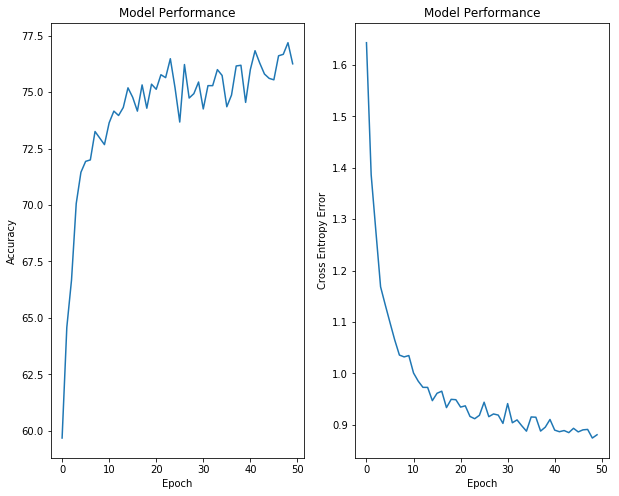

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.plot(np.arange(50),acc/len(labels_test)*100)
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(122)
plt.plot(np.arange(50),err/len(labels_test))
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Error')

In [28]:
#Implementation of One layer neural networks with SGD + momentum

#Initalize weight and bias using Xaviers Initialization
#Source:https://mnsgrg.com/2017/12/21/xavier-initialization/
hn = 30 #Number of hidden neurons
b1 = -np.sqrt(6/(16+hn)) + 2*np.sqrt(6/(16+hn))*np.random.uniform(size = (hn,1))
w1 = -np.sqrt(6/(16+hn)) + 2*np.sqrt(6/(16+hn))*np.random.uniform(size = (hn,16))
b2 = -np.sqrt(6/(26+hn)) + 2*np.sqrt(6/(26+hn))*np.random.uniform(size = (26,1))
w2 = -np.sqrt(6/(26+hn)) + 2*np.sqrt(6/(26+hn))*np.random.uniform(size = (26,hn))

#Initialize Variables
epoch = 100
lr = 0.1
alp = 0.2
lbl = np.zeros((26,1))
err = np.zeros((epoch,1))
acc = np.zeros((epoch,1))
db1 = np.zeros((hn,1))   #Gradient for bias
dw1 = np.zeros((hn,16))  #Gradient for weight
db2 = np.zeros((26,1))
dw2 = np.zeros((26,hn))

#Temp variables to save best parameters
min_err = np.Inf
max_acc = 0
bpred = np.zeros((len(labels_test),1))

for i in range(epoch):
    shuff = np.random.permutation(len(labels_train))
    #Pass over an epoch
    for j in range(len(labels_train)):
        cls = labels_train.iloc[shuff[j]]
        lbl[ord(cls[0]) - 65] = 1    #One hot encoding

        #Forward Pass
        f = np.reshape(np.array(features_train.iloc[shuff[j]]),(16,1)) #Feature needs to be reshaped due to numpy default behaviour
        l1 = np.matmul(w1,f) + b1
        o1 = 1/(1 + np.exp(-l1)) #Sigmoid
        tot = np.matmul(w2,o1) + b2
        o = softmax(tot)

        #Backward Pass (Might be a little confusing, so try doing the steps on a small matrix)
        db2 = alp*db2 + lr*(o-lbl)
        dw2 = alp*dw2+ lr*np.matmul((o-lbl),np.transpose(o1))
        db1 = alp*db1 + np.transpose(lr*np.matmul(np.transpose(o-lbl),w2))*o1*(1-o1)
        dw1 = alp*dw1 + np.matmul((np.transpose(lr*np.matmul(np.transpose(o-lbl),w2))*o1*(1-o1)),np.transpose(f))

        b1 = b1 - db1
        w1 = w1 - dw1
        b2 = b2 - db2
        w2 = w2 - dw2

        lbl[:] = 0
    
    #Check performance on test set
    for k in range(len(labels_test)):
        cls = labels_test.iloc[k]
        lbl[ord(cls[0]) - 65] = 1
        f = np.reshape(np.array(features_test.iloc[k]),(16,1))

        l1 = np.matmul(w1,f) + b1
        o1 = 1/(1 + np.exp(-l1)) #Sigmoid
        tot = np.matmul(w2,o1) + b2
        o = softmax(tot)

        maxIdx = np.argmax(o)
        pred[k] = chr(ord('A') + maxIdx)

        if pred[k] == cls[0]:
            acc[i] = acc[i] + 1

        entropy = -lbl*np.log(o)
        entropy = np.nan_to_num(entropy)
        err[i] = err[i] + np.sum(entropy)
        lbl[:] = 0

    #print('Epoch:', i, 'Accuracy:', acc[i]/len(labels_test)*100, 'Cross Entropy Error:', err[i]/len(labels_test))
    #Early Stopping condition
    if (err[i] < min_err):
        min_err = err[i]
        bpred = pred

    #Set gradient and labels back to zero
    lbl[:] = 0
    db1[:] = 0
    dw1[:] = 0
    db2[:] = 0
    dw2[:] = 0


In [36]:
print('Best Accuracy achieved:',np.around(np.max(acc)/len(labels_test)*100,decimals=3)) 

Best Accuracy achieved: 90.032


In [30]:
cnf = confusion_matrix(labels_test, bpred);cnf

array([[124,   0,   0,   1,   0,   0,   0,   0,   1,   1,   0,   2,   0,
          0,   0,   0,   1,   1,   2,   0,   1,   0,   1,   0,   3,   1],
       [  0, 105,   0,   5,   1,   1,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   1,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,  72,   0,   2,   0,   2,   1,   0,   0,   2,   1,   0,
          0,   2,   0,   0,   0,   0,   3,   1,   0,   0,   0,   0,   0],
       [  0,   6,   0, 130,   0,   2,   0,   8,   0,   0,   0,   1,   0,
          1,   0,   2,   1,   1,   1,   1,   0,   0,   0,   1,   0,   0],
       [  0,   2,   0,   0, 110,   0,   4,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   2, 111,   0,   0,   2,   1,   0,   0,   0,
          0,   0,   2,   0,   0,   0,   5,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2,   1,   2,   3, 106,   1,   0,   0,   0,   4,   0,
          0,   1,   0,   1,   1,   0,   0,   

In [31]:
print(classification_report(labels_test, bpred, target_names=data.lettr))

             precision    recall  f1-score   support

          T       0.99      0.89      0.94       139
          I       0.78      0.91      0.84       116
          D       0.97      0.84      0.90        86
          N       0.83      0.84      0.83       155
          G       0.80      0.93      0.86       118
          S       0.86      0.89      0.87       125
          B       0.84      0.86      0.85       123
          A       0.74      0.83      0.78        84
          J       0.88      0.94      0.91       105
          S       0.90      0.87      0.88        97
          M       0.90      0.78      0.83        89
          X       0.86      1.00      0.92       111
          O       1.00      0.92      0.96       142
          G       0.91      0.94      0.92       133
          M       0.87      0.85      0.86       103
          R       0.95      0.91      0.93       153
          F       0.91      0.91      0.91       133
          O       0.83      0.92      0.87   

C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 26, does not match size of target_names, 20000
  .format(len(labels), len(target_names))


Text(0,0.5,'Cross Entropy Error')

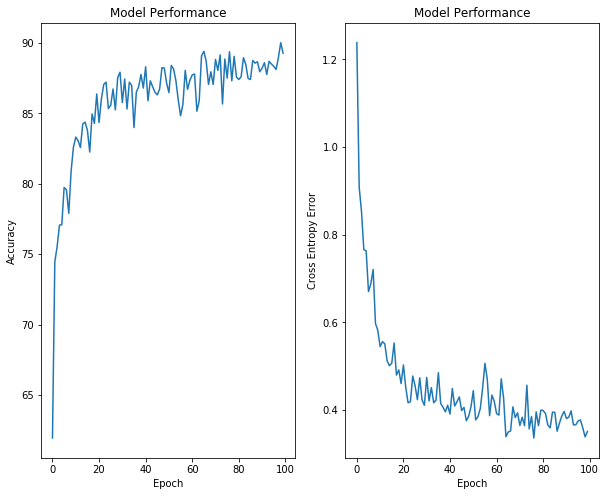

In [32]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.plot(np.arange(100),acc/len(labels_test)*100)
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(122)
plt.plot(np.arange(100),err/len(labels_test))
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Error')

In [29]:
#Implementation of 2-layer neural networks with SGD + momentum

#Initalize weight and bias using Xaviers Initialization
#Source:https://mnsgrg.com/2017/12/21/xavier-initialization/
hn1 = 64 #Number of hidden neurons in layer 1
hn2 = 32 #Number of hidden neurons in layer 2
b1 = -np.sqrt(6/(16+hn1)) + 2*np.sqrt(6/(16+hn1))*np.random.uniform(size = (hn1,1))
w1 = -np.sqrt(6/(16+hn1)) + 2*np.sqrt(6/(16+hn1))*np.random.uniform(size = (hn1,16))
b2 = -np.sqrt(6/(hn1+hn2)) + 2*np.sqrt(6/(hn1+hn2))*np.random.uniform(size = (hn2,1))
w2 = -np.sqrt(6/(hn1+hn2)) + 2*np.sqrt(6/(hn1+hn2))*np.random.uniform(size = (hn2,hn1))
b3 = -np.sqrt(6/(26+hn2)) + 2*np.sqrt(6/(26+hn2))*np.random.uniform(size = (26,1))
w3 = -np.sqrt(6/(26+hn2)) + 2*np.sqrt(6/(26+hn2))*np.random.uniform(size = (26,hn2))


#Initialize Variables
epoch = 100
lr = 0.09
alp = 0.008
lbl = np.zeros((26,1))
err = np.zeros((epoch,1))
acc = np.zeros((epoch,1))
db1 = np.zeros((hn1,1))   #Gradient for bias
dw1 = np.zeros((hn1,16))  #Gradient for weight
db2 = np.zeros((hn2,1))
dw2 = np.zeros((hn2,hn1))
db3 = np.zeros((26,1))
dw3 = np.zeros((26,hn2))

#Temp variables to save best parameters
min_err = np.Inf
max_acc = 0
bpred = np.zeros((len(labels_test),1))

for i in range(epoch):
    shuff = np.random.permutation(len(labels_train))
    #Pass over an epoch
    for j in range(len(labels_train)):
        cls = labels_train.iloc[shuff[j]]
        lbl[ord(cls[0]) - 65] = 1    #One hot encoding

        #Forward Pass
        f = np.reshape(np.array(features_train.iloc[shuff[j]]),(16,1)) #Feature needs to be reshaped due to numpy default behaviour
        l1 = np.matmul(w1,f) + b1
        o1 = 1/(1 + np.exp(-l1)) #Sigmoid
        l2 = np.matmul(w2,o1) + b2
        o2 = 1/(1 + np.exp(-l2))
        tot = np.matmul(w3,o2) + b3
        o = softmax(tot)

        #Backward Pass (Might be a little confusing, so try doing the steps on a small matrix)
        #pdb.set_trace()
        db3 = alp*db3 + lr*(o-lbl)
        dw3 = alp*db3 + lr*np.matmul((o-lbl),np.transpose(o2))
        db2 = alp*db2 + np.transpose(lr*np.matmul(np.transpose(o-lbl),w3))*o2*(1-o2)
        dw2 = alp*dw2 + np.transpose(lr*np.matmul(np.transpose(o-lbl),w3))*o2*(1-o2)*np.transpose(o1)
        db1 = alp*db1 + np.transpose(np.matmul(np.transpose(np.transpose(lr*np.matmul(np.transpose(o-lbl),w3))*o2*(1-o2)),w2))*o1*(1-o1)
        dw1 = alp*dw1 + np.matmul(np.transpose(np.matmul(np.transpose(np.transpose(lr*np.matmul(np.transpose(o-lbl),w3))*o2*(1-o2)),w2))*o1*(1-o1),np.transpose(f))

        b1 = b1 - db1
        w1 = w1 - dw1
        b2 = b2 - db2
        w2 = w2 - dw2
        b3 = b3 - db3
        w3 = w3 - dw3

        lbl[:] = 0
    
    #Check performance on test set
    for k in range(len(labels_test)):
        cls = labels_test.iloc[k]
        lbl[ord(cls[0]) - 65] = 1
        f = np.reshape(np.array(features_test.iloc[k]),(16,1))

        l1 = np.matmul(w1,f) + b1
        o1 = 1/(1 + np.exp(-l1)) #Sigmoid
        l2 = np.matmul(w2,o1) + b2
        o2 = 1/(1 + np.exp(-l2))
        tot = np.matmul(w3,o2) + b3
        o = softmax(tot)

        maxIdx = np.argmax(o)
        pred[k] = chr(ord('A') + maxIdx)

        if pred[k] == cls[0]:
            acc[i] = acc[i] + 1

        entropy = -lbl*np.log(o)
        entropy = np.nan_to_num(entropy)
        err[i] = err[i] + np.sum(entropy)
        lbl[:] = 0

    #pdb.set_trace()
    #print('Epoch:', i, 'Accuracy:', acc[i]/len(labels_test)*100, 'Cross Entropy Error:', err[i]/len(labels_test))
    #Early Stopping condition
    if (err[i] < min_err):
        min_err = err[i]
        bpred = pred

    #Set gradient and labels back to zero
    lbl[:] = 0
    db1[:] = 0
    dw1[:] = 0
    db2[:] = 0
    dw2[:] = 0


In [30]:
print('Best Accuracy achieved:',np.around(np.max(acc)/len(labels_test)*100,decimals=3)) 

Best Accuracy achieved: 95.323


In [31]:
cnf = confusion_matrix(labels_test, bpred);cnf

array([[138,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 106,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   7,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  86,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 146,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          4,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   1,   0, 106,   3,   3,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   1],
       [  0,   1,   0,   0,   0, 122,   1,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   3,   0,   1,   2, 109,   2,   0,   0,   2,   0,   0,
          0,   0,   0,   1,   1,   0,   0,   

In [32]:
print(classification_report(labels_test, bpred, target_names=data.lettr))

             precision    recall  f1-score   support

          T       0.99      0.99      0.99       139
          I       0.88      0.91      0.90       116
          D       0.93      1.00      0.97        86
          N       0.97      0.94      0.96       155
          G       0.99      0.90      0.94       118
          S       0.87      0.98      0.92       125
          B       0.93      0.89      0.91       123
          A       0.85      0.93      0.89        84
          J       0.96      0.94      0.95       105
          S       0.91      0.95      0.93        97
          M       0.94      0.88      0.91        89
          X       0.96      0.99      0.98       111
          O       0.99      0.97      0.98       142
          G       0.95      0.98      0.96       133
          M       0.92      0.99      0.95       103
          R       1.00      0.92      0.96       153
          F       0.98      0.95      0.96       133
          O       0.85      0.95      0.90   

C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 26, does not match size of target_names, 20000
  .format(len(labels), len(target_names))


Text(0,0.5,'Cross Entropy Error')

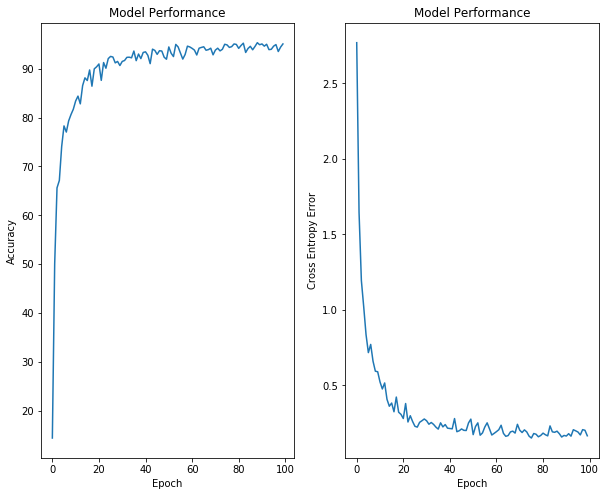

In [33]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.plot(np.arange(100),acc/len(labels_test)*100)
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(122)
plt.plot(np.arange(100),err/len(labels_test))
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Error')

The best machine learning models for tabular data like the one shown above are decision trees and random forests. Our neural network with 2 hidden layers does relatively very well on the dataset achieving 95-96% accuracy. Lets see how good this performance is compared to decision trees and random forests.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
ypred = clf.predict(features_test)
acc = np.sum(np.array(ypred) == np.reshape(np.array(labels_test),(-1)))/len(labels_test)
print('The accuracy acheived using Random Forests: ', np.around(acc*100,3))

The accuracy acheived using Random Forests:  87.355


In [56]:
cnf = confusion_matrix(labels_test, ypred);cnf

array([[121,   0,   2,   0,   0,   0,   2,   1,   0,   2,   0,   2,   1,
          1,   0,   1,   0,   1,   0,   0,   2,   0,   0,   2,   0,   1],
       [  0, 100,   0,   1,   0,   1,   3,   2,   1,   1,   1,   0,   0,
          0,   2,   0,   2,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  78,   0,   2,   0,   2,   0,   0,   1,   0,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   2,   0, 123,   1,   0,   0,   7,   1,   1,   1,   0,   1,
          4,   3,   1,   1,   0,   4,   1,   1,   0,   0,   2,   0,   1],
       [  0,   1,   2,   0, 103,   1,   2,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   1,   0,   3,   0,   0,   0,   0,   1,   0,   3],
       [  0,   2,   0,   0,   0, 106,   3,   2,   1,   3,   0,   0,   0,
          0,   0,   1,   0,   0,   2,   0,   0,   1,   1,   1,   2,   0],
       [  0,   1,   0,   3,   4,   0, 101,   1,   1,   0,   1,   2,   1,
          0,   1,   1,   0,   0,   1,   1,   

In [57]:
print(classification_report(labels_test, ypred, target_names=data.lettr))

             precision    recall  f1-score   support

          T       0.95      0.87      0.91       139
          I       0.81      0.86      0.84       116
          D       0.92      0.91      0.91        86
          N       0.88      0.79      0.83       155
          G       0.86      0.87      0.87       118
          S       0.82      0.85      0.83       125
          B       0.84      0.82      0.83       123
          A       0.68      0.77      0.72        84
          J       0.92      0.93      0.93       105
          S       0.85      0.93      0.89        97
          M       0.78      0.82      0.80        89
          X       0.93      0.95      0.94       111
          O       0.90      0.87      0.88       142
          G       0.88      0.89      0.88       133
          M       0.82      0.90      0.86       103
          R       0.90      0.88      0.89       153
          F       0.89      0.83      0.86       133
          O       0.85      0.87      0.86   

C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 26, does not match size of target_names, 20000
  .format(len(labels), len(target_names))


In [63]:
clf = RandomForestClassifier(n_estimators=50,bootstrap = True);
clf.fit(features_train, labels_train);
ypred = clf.predict(features_test);
acc = np.sum(np.array(ypred) == np.reshape(np.array(labels_test),(-1)))/len(labels_test)
print('The accuracy acheived using Random Forests: ', np.around(acc*100,3))

C:\Users\Salman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


The accuracy acheived using Random Forests:  96.613


In [64]:
cnf = confusion_matrix(labels_test, ypred);cnf

array([[139,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 114,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  84,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 153,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 112,   0,   2,   0,   0,   0,   1,   0,   1,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   1,   0,   1,   0, 118,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   3,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   0,   1, 117,   1,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   

In [65]:
print(classification_report(labels_test, bpred, target_names=data.lettr))

             precision    recall  f1-score   support

          T       0.99      0.99      0.99       139
          I       0.88      0.91      0.90       116
          D       0.93      1.00      0.97        86
          N       0.97      0.94      0.96       155
          G       0.99      0.90      0.94       118
          S       0.87      0.98      0.92       125
          B       0.93      0.89      0.91       123
          A       0.85      0.93      0.89        84
          J       0.96      0.94      0.95       105
          S       0.91      0.95      0.93        97
          M       0.94      0.88      0.91        89
          X       0.96      0.99      0.98       111
          O       0.99      0.97      0.98       142
          G       0.95      0.98      0.96       133
          M       0.92      0.99      0.95       103
          R       1.00      0.92      0.96       153
          F       0.98      0.95      0.96       133
          O       0.85      0.95      0.90   

C:\Users\Salman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 26, does not match size of target_names, 20000
  .format(len(labels), len(target_names))


Using just decision trees results in an accuracy of 87% which is poorer than our Nerual Net. However, Random Forests (no of trees - 50) out-perform the neural networks, although by just a small margin. This shows that our networks performance is good enough!  